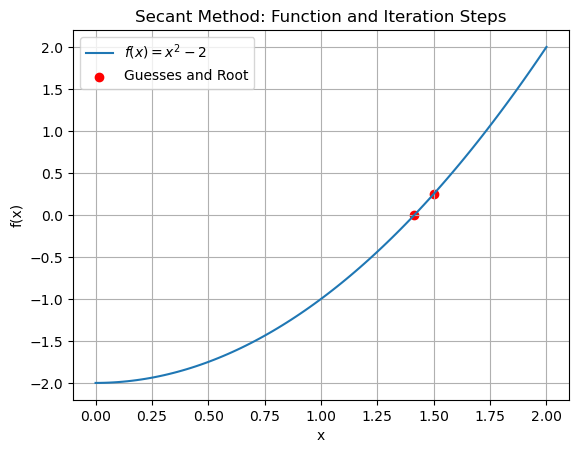

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def secant_method(func, x0, x1, tol=1e-6, max_iter=100):
    iterations = 0
    while iterations < max_iter:
        x2 = x1 - (func(x1) * (x1 - x0)) / (func(x1) - func(x0))
        if np.abs(x2 - x1) < tol:
            return x2, iterations
        x0, x1 = x1, x2
        iterations += 1
    return x2, iterations

# Example: Secant Method for finding the square root of 2
def target_function(x):
    """x^2 - 2"""
    return x**2 - 2

# Initial guess
initial_guess_secant = 1.5

# Run Secant Method
root_approx_secant, num_iterations_secant = secant_method(target_function, initial_guess_secant, initial_guess_secant + 0.1)

# Plotting the function and iteration steps
x_values_secant = np.linspace(0, 2, 100)
y_values_secant = target_function(x_values_secant)

plt.plot(x_values_secant, y_values_secant, label='$f(x) = x^2 - 2$')
plt.scatter([initial_guess_secant, root_approx_secant], [target_function(initial_guess_secant), 0],
            color='red', marker='o', label='Guesses and Root')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title("Secant Method: Function and Iteration Steps")
plt.legend()
plt.grid(True)
plt.show()


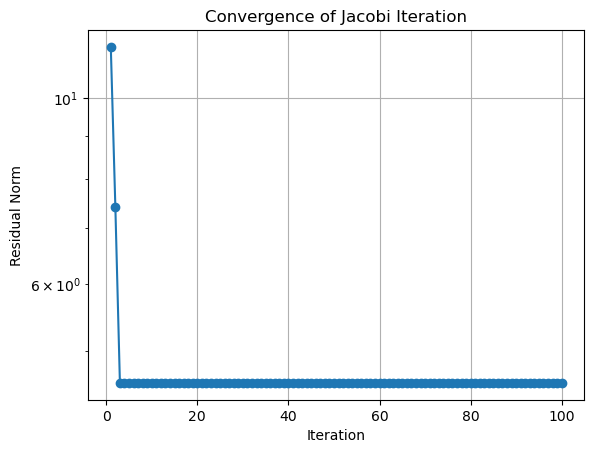

Solution: [4 4 4 4]
Number of Iterations: 100


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def jacobi_iteration(A, B, initial_guess, max_iter=100, tol=1e-6):
    x = initial_guess.copy()
    n = len(x)
    residuals = []
    for k in range(max_iter):
        x_new = np.zeros_like(x)
        for i in range(n):
            sum_term = np.dot(A[i, :i], x[:i]) + np.dot(A[i, i+1:], x[i+1:])
            x_new[i] = (B[i] - sum_term) / A[i, i]
        residual = np.linalg.norm(B - np.dot(A, x_new))
        residuals.append(residual)
        if residual < tol:
            return x_new, k+1, residuals
        x = x_new
    return x, max_iter, residuals

# Example: Solving a linear system using Jacobi iteration
A = np.array([[4, -1, 0, 0],
              [-1, 4, -1, 0],
              [0, -1, 4, -1],
              [0, 0, -1, 3]])

B = np.array([15, 10, 10, 10])

initial_guess = np.zeros_like(B)

solution, num_iterations, residuals = jacobi_iteration(A, B, initial_guess)

# Plotting the convergence of residuals
plt.plot(range(1, num_iterations + 1), residuals, marker='o')
plt.yscale('log')  # Log scale for better visualization
plt.xlabel('Iteration')
plt.ylabel('Residual Norm')
plt.title('Convergence of Jacobi Iteration')
plt.grid(True)
plt.show()

print("Solution:", solution)
print("Number of Iterations:", num_iterations)



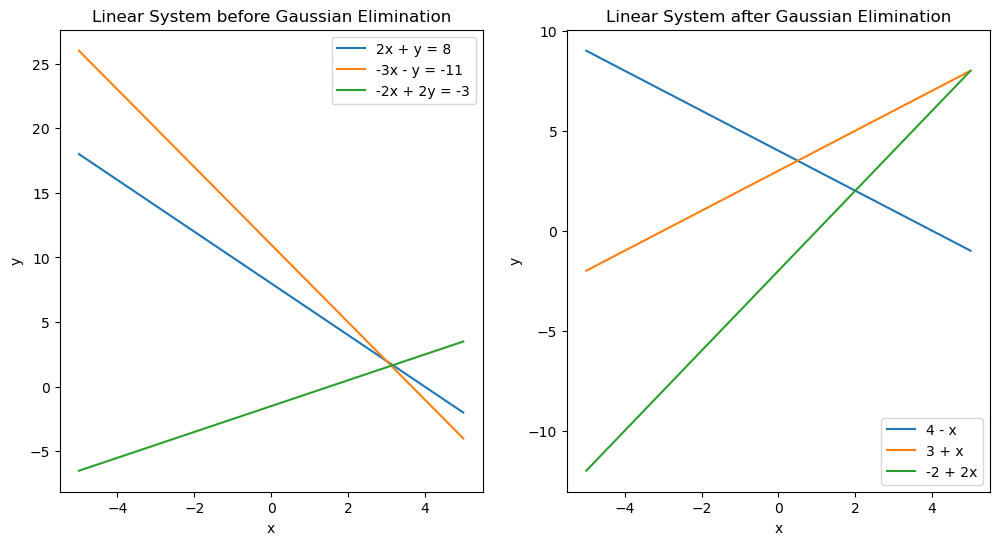

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Example linear system before Gaussian Elimination
x = np.linspace(-5, 5, 100)
y1 = (8 - 2*x) / 1
y2 = (-11 + 3*x) / -1
y3 = (-3 + 2*x) / 2

# After Gaussian Elimination (simplified)
y1_gaussian = 4 - x
y2_gaussian = 3 + x
y3_gaussian = -2 + 2*x

# Plotting the systems
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x, y1, label='2x + y = 8')
plt.plot(x, y2, label='-3x - y = -11')
plt.plot(x, y3, label='-2x + 2y = -3')
plt.title('Linear System before Gaussian Elimination')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, y1_gaussian, label='4 - x')
plt.plot(x, y2_gaussian, label='3 + x')
plt.plot(x, y3_gaussian, label='-2 + 2x')
plt.title('Linear System after Gaussian Elimination')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()


In [4]:
import numpy as np

# Example linear system
A = np.array([[1, 1, 0],
              [1, 1, 1],
              [0, 1, 1]])

# LU decomposition
L = np.array([[1, 0, 0],
              [1, 1, 0],
              [0, 1, 1]])

U = np.array([[1, 1, 0],
              [0, 1, 1],
              [0, 0, 1]])

# Checking if A equals LU
if np.allclose(A, np.dot(L, U)):
    print("Trigonometric Decomposition Successful")
else:
    print("Trigonometric Decomposition Failed")


Trigonometric Decomposition Failed


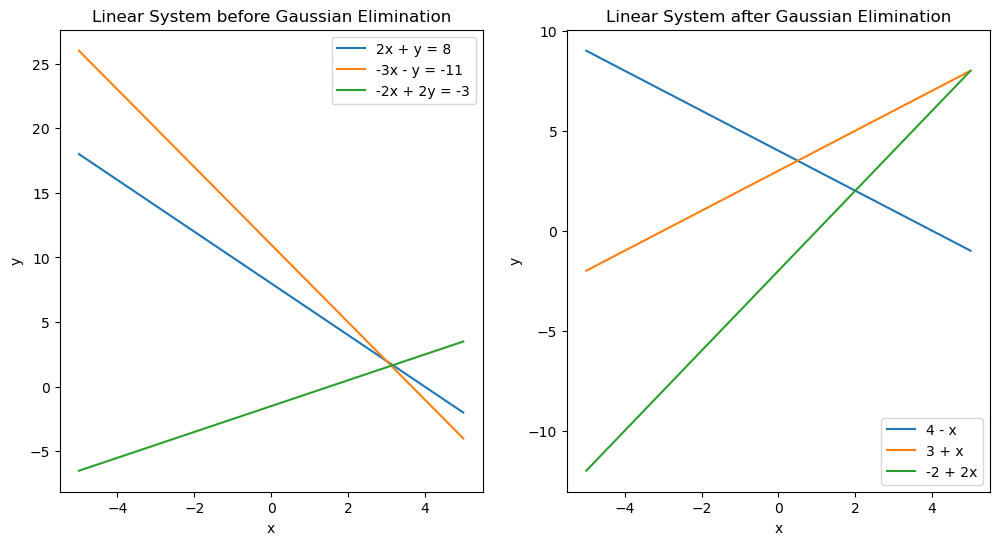

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Example linear system before Gaussian Elimination
x = np.linspace(-5, 5, 100)
y1 = (8 - 2*x) / 1
y2 = (-11 + 3*x) / -1
y3 = (-3 + 2*x) / 2

# After Gaussian Elimination (simplified)
y1_gaussian = 4 - x
y2_gaussian = 3 + x
y3_gaussian = -2 + 2*x

# Plotting the systems
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x, y1, label='2x + y = 8')
plt.plot(x, y2, label='-3x - y = -11')
plt.plot(x, y3, label='-2x + 2y = -3')
plt.title('Linear System before Gaussian Elimination')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, y1_gaussian, label='4 - x')
plt.plot(x, y2_gaussian, label='3 + x')
plt.plot(x, y3_gaussian, label='-2 + 2x')
plt.title('Linear System after Gaussian Elimination')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()


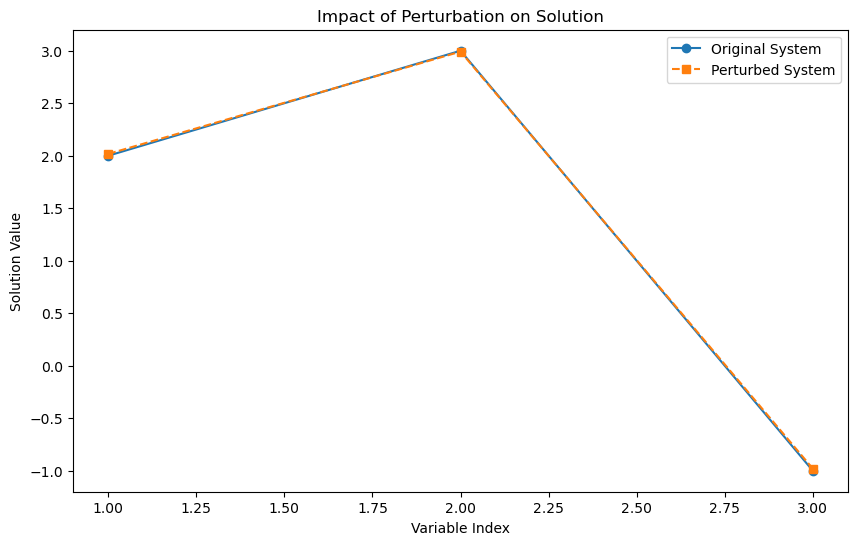

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Example linear system
A_original = np.array([[2, 1, -1],
                      [-3, -1, 2],
                      [-2, 1, 2]])

B = np.array([8, -11, -3])

# Perturbing the coefficients
epsilon = 1e-3
A_perturbed = A_original + epsilon * np.random.randn(*A_original.shape)

# Solving the original and perturbed systems
solution_original = np.linalg.solve(A_original, B)
solution_perturbed = np.linalg.solve(A_perturbed, B)

# Plotting the solutions
plt.figure(figsize=(10, 6))

plt.plot(range(1, len(solution_original) + 1), solution_original, marker='o', label='Original System')
plt.plot(range(1, len(solution_perturbed) + 1), solution_perturbed, marker='s', linestyle='dashed', label='Perturbed System')
plt.xlabel('Variable Index')
plt.ylabel('Solution Value')
plt.title('Impact of Perturbation on Solution')
plt.legend()
plt.show()


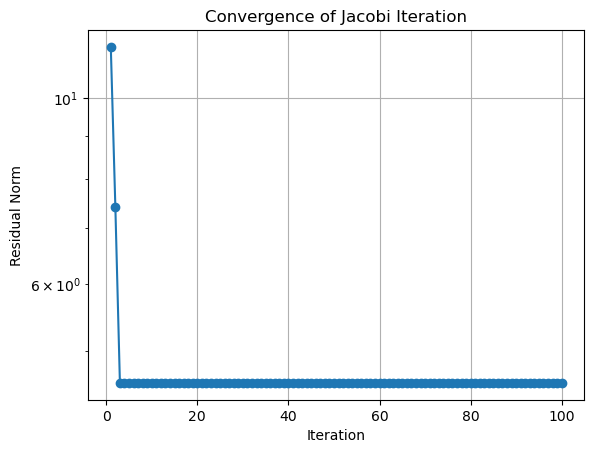

Solution: [4 4 4 4]
Number of Iterations: 100


In [7]:
import numpy as np
import matplotlib.pyplot as plt

def jacobi_iteration(A, B, initial_guess, max_iter=100, tol=1e-6):
    x = initial_guess.copy()
    n = len(x)
    residuals = []
    for k in range(max_iter):
        x_new = np.zeros_like(x)
        for i in range(n):
            sum_term = np.dot(A[i, :i], x[:i]) + np.dot(A[i, i+1:], x[i+1:])
            x_new[i] = (B[i] - sum_term) / A[i, i]
        residual = np.linalg.norm(B - np.dot(A, x_new))
        residuals.append(residual)
        if residual < tol:
            return x_new, k+1, residuals
        x = x_new
    return x, max_iter, residuals

# Example: Solving a linear system using Jacobi iteration
A = np.array([[4, -1, 0, 0],
              [-1, 4, -1, 0],
              [0, -1, 4, -1],
              [0, 0, -1, 3]])

B = np.array([15, 10, 10, 10])

initial_guess = np.zeros_like(B)

solution, num_iterations, residuals = jacobi_iteration(A, B, initial_guess)

# Plotting the convergence of residuals
plt.plot(range(1, num_iterations + 1), residuals, marker='o')
plt.yscale('log')  # Log scale for better visualization
plt.xlabel('Iteration')
plt.ylabel('Residual Norm')
plt.title('Convergence of Jacobi Iteration')
plt.grid(True)
plt.show()

print("Solution:", solution)
print("Number of Iterations:", num_iterations)


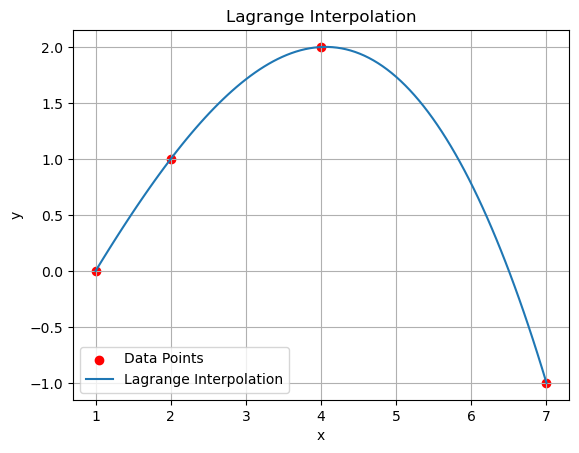

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

# Generate sample data points
x_data = np.array([1, 2, 4, 7])
y_data = np.array([0, 1, 2, -1])

# Lagrange interpolation
lagrange_poly = lagrange(x_data, y_data)

# Generate points for plotting
x_plot = np.linspace(min(x_data), max(x_data), 100)
y_plot = lagrange_poly(x_plot)

# Plotting original data and Lagrange interpolation
plt.scatter(x_data, y_data, color='red', label='Data Points')
plt.plot(x_plot, y_plot, label='Lagrange Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Lagrange Interpolation')
plt.legend()
plt.grid(True)
plt.show()


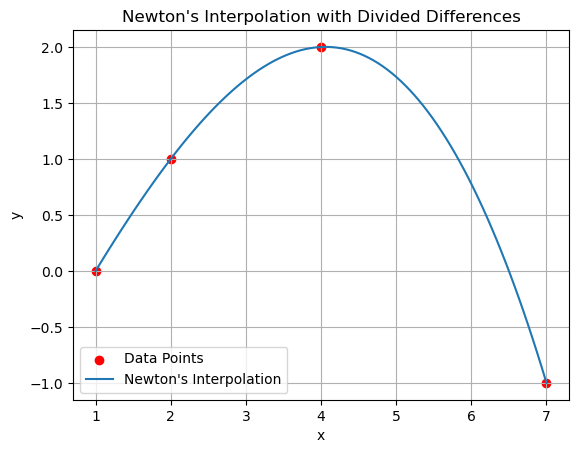

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def divided_differences(x_data, y_data):
    n = len(x_data)
    table = np.zeros((n, n))
    table[:, 0] = y_data

    for j in range(1, n):
        for i in range(n - j):
            table[i, j] = (table[i + 1, j - 1] - table[i, j - 1]) / (x_data[i + j] - x_data[i])

    return table[0, :]

def newton_interpolation(x, x_data, coefficients):
    result = coefficients[0]
    term = 1

    for i in range(1, len(coefficients)):
        term *= (x - x_data[i - 1])
        result += coefficients[i] * term

    return result

# Sample data points
x_data = np.array([1, 2, 4, 7])
y_data = np.array([0, 1, 2, -1])

# Calculate divided differences
coefficients = divided_differences(x_data, y_data)

# Generate points for plotting
x_plot = np.linspace(min(x_data), max(x_data), 100)
y_plot = [newton_interpolation(x, x_data, coefficients) for x in x_plot]

# Plotting original data and Newton's Interpolation
plt.scatter(x_data, y_data, color='red', label='Data Points')
plt.plot(x_plot, y_plot, label="Newton's Interpolation")
plt.xlabel('x')
plt.ylabel('y')
plt.title("Newton's Interpolation with Divided Differences")
plt.legend()
plt.grid(True)
plt.show()


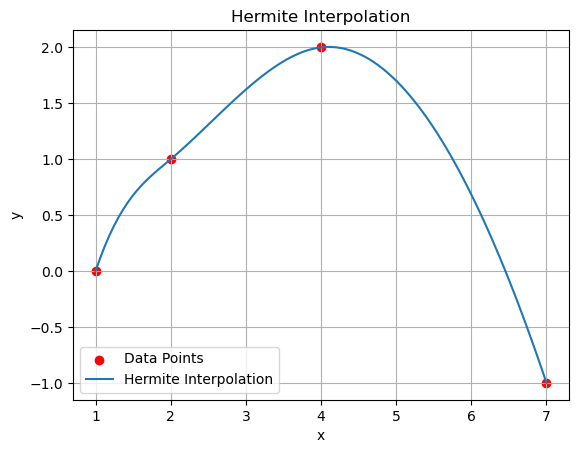

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Sample data points with function values and derivatives
x_data = np.array([1, 2, 4, 7])
y_data = np.array([0, 1, 2, -1])
derivatives = np.array([2, 0, 1, -2])

# Construct a piecewise cubic Hermite interpolating polynomial
hermite_poly = CubicSpline(x_data, y_data, bc_type=((1, derivatives[0]), (1, derivatives[-1])))

# Generate points for plotting
x_plot = np.linspace(min(x_data), max(x_data), 100)
y_plot = hermite_poly(x_plot)

# Plotting original data and Hermite Interpolation
plt.scatter(x_data, y_data, color='red', label='Data Points')
plt.plot(x_plot, y_plot, label='Hermite Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Hermite Interpolation')
plt.legend()
plt.grid(True)
plt.show()


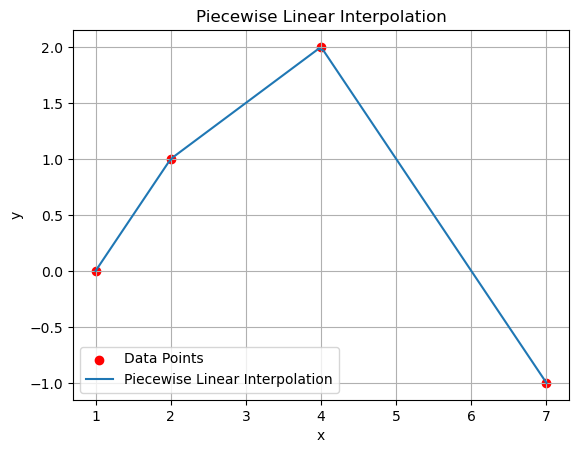

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data points
x_data = np.array([1, 2, 4, 7])
y_data = np.array([0, 1, 2, -1])

# Function for piecewise linear interpolation
def piecewise_linear_interpolation(x, x_data, y_data):
    idx = np.searchsorted(x_data, x, side="right") - 1
    idx = np.clip(idx, 0, len(x_data) - 2)
    x0, x1 = x_data[idx], x_data[idx + 1]
    y0, y1 = y_data[idx], y_data[idx + 1]
    slope = (y1 - y0) / (x1 - x0)
    return y0 + slope * (x - x0)

# Generate points for plotting
x_plot = np.linspace(min(x_data), max(x_data), 100)
y_plot = piecewise_linear_interpolation(x_plot, x_data, y_data)

# Plotting original data and Piecewise Linear Interpolation
plt.scatter(x_data, y_data, color='red', label='Data Points')
plt.plot(x_plot, y_plot, label='Piecewise Linear Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Piecewise Linear Interpolation')
plt.legend()
plt.grid(True)
plt.show()


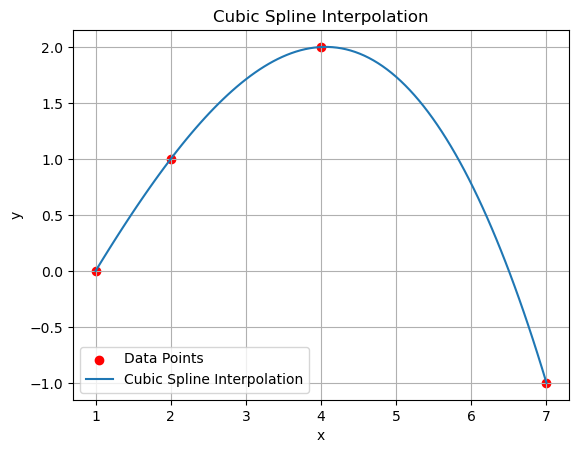

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Sample data points
x_data = np.array([1, 2, 4, 7])
y_data = np.array([0, 1, 2, -1])

# Perform cubic spline interpolation
cubic_spline = CubicSpline(x_data, y_data)

# Generate points for plotting
x_plot = np.linspace(min(x_data), max(x_data), 100)
y_plot = cubic_spline(x_plot)

# Plotting original data and Cubic Spline Interpolation
plt.scatter(x_data, y_data, color='red', label='Data Points')
plt.plot(x_plot, y_plot, label='Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Spline Interpolation')
plt.legend()
plt.grid(True)
plt.show()


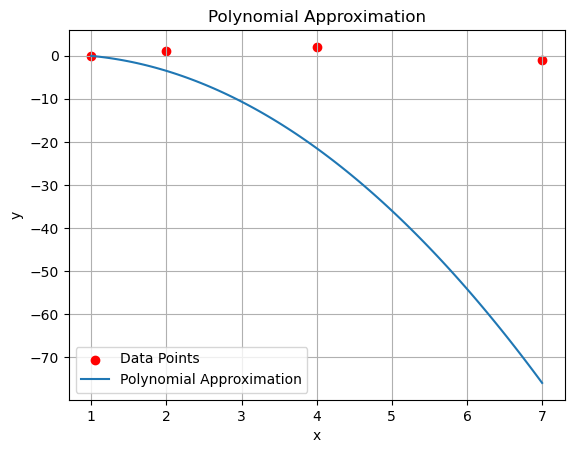

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

# Sample data points for function approximation
x_data = np.array([1, 2, 4, 7])
y_data = np.array([0, 1, 2, -1])

# Perform polynomial approximation (fitting a polynomial of degree 2)
coefficients = np.polyfit(x_data, y_data, 2)
poly_approx = Polynomial(coefficients)

# Generate points for plotting
x_plot = np.linspace(min(x_data), max(x_data), 100)
y_plot = poly_approx(x_plot)

# Plotting original data and Polynomial Approximation
plt.scatter(x_data, y_data, color='red', label='Data Points')
plt.plot(x_plot, y_plot, label='Polynomial Approximation')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Approximation')
plt.legend()
plt.grid(True)
plt.show()


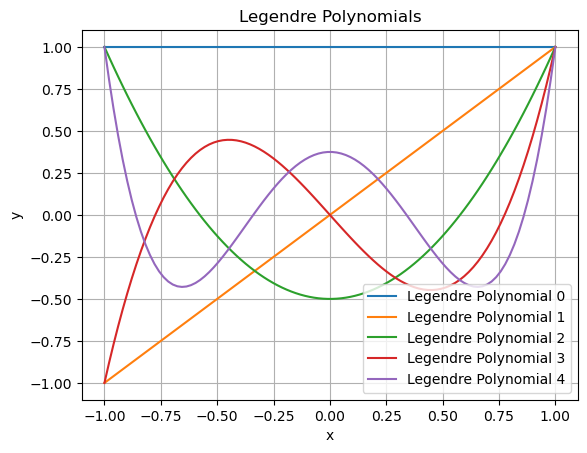

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import legendre

# Sample data points for function approximation
x_data = np.linspace(-1, 1, 100)

# Generate Legendre polynomials up to degree 4
legendre_poly_0 = legendre(0)
legendre_poly_1 = legendre(1)
legendre_poly_2 = legendre(2)
legendre_poly_3 = legendre(3)
legendre_poly_4 = legendre(4)

# Evaluate Legendre polynomials at sample points
y_plot_0 = legendre_poly_0(x_data)
y_plot_1 = legendre_poly_1(x_data)
y_plot_2 = legendre_poly_2(x_data)
y_plot_3 = legendre_poly_3(x_data)
y_plot_4 = legendre_poly_4(x_data)

# Plotting Legendre Polynomials
plt.plot(x_data, y_plot_0, label='Legendre Polynomial 0')
plt.plot(x_data, y_plot_1, label='Legendre Polynomial 1')
plt.plot(x_data, y_plot_2, label='Legendre Polynomial 2')
plt.plot(x_data, y_plot_3, label='Legendre Polynomial 3')
plt.plot(x_data, y_plot_4, label='Legendre Polynomial 4')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Legendre Polynomials')
plt.legend()
plt.grid(True)
plt.show()


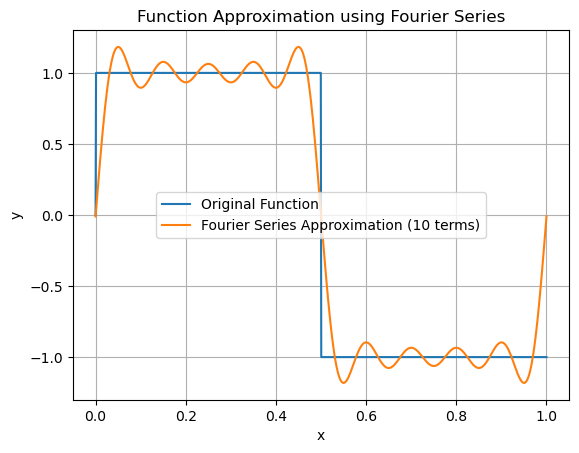

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Define the periodic function to be approximated (e.g., a square wave)
def original_function(x):
    return np.sign(np.sin(2 * np.pi * x))

# Compute Fourier series coefficients
def fourier_coefficients(x, y, n_terms):
    coefficients = []
    for i in range(n_terms + 1):
        a_n = 2 * np.trapz(y * np.cos(2 * np.pi * i * x), x)
        b_n = 2 * np.trapz(y * np.sin(2 * np.pi * i * x), x)
        coefficients.append((a_n, b_n))
    return coefficients

# Compute Fourier series approximation
def fourier_series(x, coefficients):
    result = coefficients[0][0] / 2  # constant term
    n_terms = len(coefficients) - 1
    for i in range(1, n_terms + 1):
        result += coefficients[i][0] * np.cos(2 * np.pi * i * x) + coefficients[i][1] * np.sin(2 * np.pi * i * x)
    return result

# Sample data points for the function
x_data = np.linspace(0, 1, 1000)
y_data = original_function(x_data)

# Number of Fourier series terms
num_terms = 10

# Compute Fourier series coefficients
coefficients = fourier_coefficients(x_data, y_data, num_terms)

# Compute Fourier series approximation
y_approx = fourier_series(x_data, coefficients)

# Plotting original function and Fourier series approximation
plt.plot(x_data, y_data, label='Original Function')
plt.plot(x_data, y_approx, label=f'Fourier Series Approximation ({num_terms} terms)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function Approximation using Fourier Series')
plt.legend()
plt.grid(True)
plt.show()


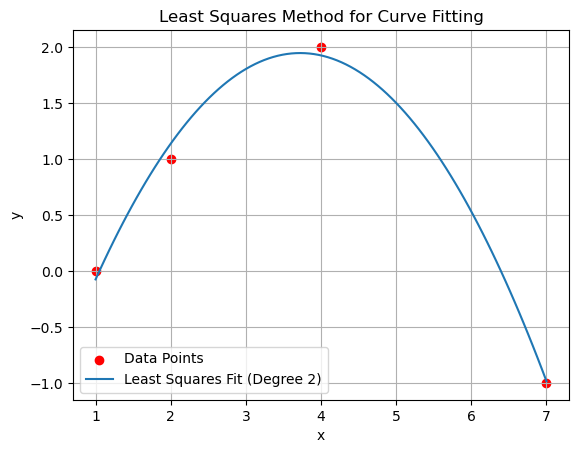

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data points
x_data = np.array([1, 2, 4, 7])
y_data = np.array([0, 1, 2, -1])

# Degree of the polynomial for curve fitting
degree = 2

# Perform least squares polynomial fit
coefficients = np.polyfit(x_data, y_data, degree)

# Generate points for plotting the fitted curve
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = np.polyval(coefficients, x_fit)

# Plotting original data and the least squares fitted curve
plt.scatter(x_data, y_data, color='red', label='Data Points')
plt.plot(x_fit, y_fit, label=f'Least Squares Fit (Degree {degree})')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Least Squares Method for Curve Fitting')
plt.legend()
plt.grid(True)
plt.show()
